In [ ]:
import numpy as np

import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt



df=pd.read_csv("/content/drive/MyDrive/Thesis Thinngs/wesad_swell_comb_label.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527288 entries, 0 to 527287
Data columns (total 64 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MEAN_RR                   527288 non-null  float64
 1   MEDIAN_RR                 527288 non-null  float64
 2   SDRR                      527288 non-null  float64
 3   RMSSD                     527288 non-null  float64
 4   SDSD                      527288 non-null  float64
 5   SDRR_RMSSD                527288 non-null  float64
 6   HR                        527288 non-null  float64
 7   pNN25                     527288 non-null  float64
 8   pNN50                     527288 non-null  float64
 9   SD1                       527288 non-null  float64
 10  SD2                       527288 non-null  float64
 11  KURT                      527288 non-null  float64
 12  SKEW                      527288 non-null  float64
 13  MEAN_REL_RR               527288 non-null  f

In [ ]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,condition,condition_label
0,1183.843150,1181.251800,365.254689,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,516.420570,-0.373785,-0.385042,0.000489,-0.000682,0.020493,0.011213,0.011213,1.827570,-0.373785,-0.385042,6074.759991,93.166507,418.585262,6.419698,93.944607,26.980773,0.413795,6.055393,6520.326026,15.514206,0.064457,7.077366,34.407022,80.748536,-0.000683,0.011151,0.011151,8.712062,6.039267,3.331518,8.782833,2.804221,2.846786,3.157073,2.439444,0.875469,2.524061,-0.437762,-0.402175,0.000429,-0.402175,5.969075,6.047394,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,stress,stress
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,141.337907,-0.380545,-0.046871,-0.000026,-0.002017,0.021379,0.009455,0.009455,2.261110,-0.380545,-0.046871,2635.166019,58.666097,1849.940776,41.184808,99.639291,6.697061,0.149095,0.360709,4491.803856,276.231752,0.003620,6.929558,31.953746,67.020921,-0.002019,0.009411,0.009411,7.877081,7.523449,2.040839,8.410232,5.624854,3.116232,1.733800,3.237370,1.098612,2.788164,-0.484715,-0.044256,-0.000026,-0.044256,17010.941850,2.029246,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,no stress,no stress
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,152.086226,0.795182,-0.883129,-0.000236,-0.002134,0.021503,0.009040,0.009040,2.378754,0.795182,-0.883129,1432.340330,41.644429,1987.435700,57.783492,99.019666,19.676393,0.572079,0.980334,3439.452423,101.006099,0.009900,6.710690,28.638037,58.646845,-0.002136,0.008999,0.008999,7.267763,7.595104,3.028993,8.143358,4.625033,2.894660,1.990218,2.671847,0.470004,2.571003,0.458363,-0.549709,-0.000213,-0.549709,0.677698,1.197767,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,stress,stress
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,180.359637,0.684130,-0.322346,-0.000229,-0.000589,0.022966,0.012660,0.012660,1.814036,0.684130,-0.322346,4797.649891,82.403871,949.060452,16.300951,92.639413,75.406806,1.295178,7.360587,5822.117149,12.585873,0.079454,6.575633,26.765648,76.302799,-0.000589,0.012580,0.012580,8.476090,6.856526,4.336072,8.669591,2.609030,2.823535,2.204837,2.439444,0.470004,2.501542,0.501366,-0.339236,-0.000231,-0.339236,1.329204,2.163583,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,no stress,no stress
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,510.768116,-1.126756,-0.058487,0.000637,0.000237,0.020838,0.012575,0.012575,1.657112,-1.126756,-0.058487,5728.252158,92.169826,457.885200,7.367553,94.091814,28.751397,0.462621,5.908186,6214.888755,15.925668,0.062792,6.885925,31.263503,78.834566,0.000237,0.012497,0.012497,8.653340,6.128800,3.392876,8.734864,2.828831,2.742851,3.252684,2.079442,0.847298,2.422322,-1.524474,-0.059619,0.000618,-0.059619,13.101780,6.459329,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,stress,stress


In [ ]:
 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['condition_label']= label_encoder.fit_transform(df['condition_label']) 
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,condition,condition_label
0,1183.843150,1181.251800,365.254689,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,516.420570,-0.373785,-0.385042,0.000489,-0.000682,0.020493,0.011213,0.011213,1.827570,-0.373785,-0.385042,6074.759991,93.166507,418.585262,6.419698,93.944607,26.980773,0.413795,6.055393,6520.326026,15.514206,0.064457,7.077366,34.407022,80.748536,-0.000683,0.011151,0.011151,8.712062,6.039267,3.331518,8.782833,2.804221,2.846786,3.157073,2.439444,0.875469,2.524061,-0.437762,-0.402175,0.000429,-0.402175,5.969075,6.047394,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,stress,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,141.337907,-0.380545,-0.046871,-0.000026,-0.002017,0.021379,0.009455,0.009455,2.261110,-0.380545,-0.046871,2635.166019,58.666097,1849.940776,41.184808,99.639291,6.697061,0.149095,0.360709,4491.803856,276.231752,0.003620,6.929558,31.953746,67.020921,-0.002019,0.009411,0.009411,7.877081,7.523449,2.040839,8.410232,5.624854,3.116232,1.733800,3.237370,1.098612,2.788164,-0.484715,-0.044256,-0.000026,-0.044256,17010.941850,2.029246,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,no stress,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,152.086226,0.795182,-0.883129,-0.000236,-0.002134,0.021503,0.009040,0.009040,2.378754,0.795182,-0.883129,1432.340330,41.644429,1987.435700,57.783492,99.019666,19.676393,0.572079,0.980334,3439.452423,101.006099,0.009900,6.710690,28.638037,58.646845,-0.002136,0.008999,0.008999,7.267763,7.595104,3.028993,8.143358,4.625033,2.894660,1.990218,2.671847,0.470004,2.571003,0.458363,-0.549709,-0.000213,-0.549709,0.677698,1.197767,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,stress,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,180.359637,0.684130,-0.322346,-0.000229,-0.000589,0.022966,0.012660,0.012660,1.814036,0.684130,-0.322346,4797.649891,82.403871,949.060452,16.300951,92.639413,75.406806,1.295178,7.360587,5822.117149,12.585873,0.079454,6.575633,26.765648,76.302799,-0.000589,0.012580,0.012580,8.476090,6.856526,4.336072,8.669591,2.609030,2.823535,2.204837,2.439444,0.470004,2.501542,0.501366,-0.339236,-0.000231,-0.339236,1.329204,2.163583,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,no stress,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,510.768116,-1.126756,-0.058487,0.000637,0.000237,0.020838,0.012575,0.012575,1.657112,-1.126756,-0.058487,5728.252158,92.169826,457.885200,7.367553,94.091814,28.751397,0.462621,5.908186,6214.888755,15.925668,0.062792,6.885925,31.263503,78.834566,0.000237,0.012497,0.012497,8.653340,6.128800,3.392876,8.734864,2.828831,2.742851,3.252684,2.079442,0.847298,2.422322,-1.524474,-0.059619,0.000618,-0.059619,13.101780,6.459329,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,stress,1


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, stratify = df['condition'],
    train_size=0.7,
    random_state=20)

In [ ]:
print(test.shape)
print(train.shape)


(158187, 64)
(369101, 64)


In [ ]:
X_train=train.drop(labels=['condition',"condition_label"], axis=1)
y_train=train['condition_label']
y_train
X_train.corr()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF
MEAN_RR,1.000000,0.971701,0.466328,0.463789,0.463731,0.285038,-0.940017,0.398582,0.347447,0.463613,0.465547,-0.260955,-0.335404,0.026388,-0.145274,0.025477,-0.292139,-0.292139,0.572094,-0.260955,-0.335404,0.488783,0.305903,0.229959,-0.242375,0.576796,-0.447621,-0.587935,-0.576796,0.506465,0.418768,-0.532048,0.990595,0.997724,0.537211,-0.145182,-0.291749,-0.291749,0.569377,0.285626,-0.602389,0.550629,0.716875,0.488634,0.257459,0.448653,0.370521,0.487834,-0.281740,-0.313364,0.026453,-0.313364,0.293233,-0.224516,0.313338,-0.081146,-0.956336,-0.000464,0.215001,-0.319946,0.242797,-0.507692
MEDIAN_RR,0.971701,1.000000,0.359435,0.442359,0.442351,0.179125,-0.925872,0.383634,0.318751,0.442253,0.358655,-0.256286,-0.426849,0.024474,-0.151358,0.007777,-0.298397,-0.298397,0.560034,-0.256286,-0.426849,0.408766,0.252188,0.228816,-0.190565,0.573277,-0.453799,-0.555798,-0.573277,0.435041,0.411918,-0.527755,0.960326,0.968279,0.469131,-0.151270,-0.298039,-0.298039,0.501133,0.276863,-0.602368,0.489128,0.710930,0.464636,0.163273,0.423769,0.333014,0.463959,-0.270840,-0.404958,0.025019,-0.404958,0.288023,-0.214576,0.307037,-0.082720,-0.942527,-0.000242,0.181711,-0.307089,0.235562,-0.477740
SDRR,0.466328,0.359435,1.000000,0.290753,0.290494,0.894508,-0.254556,0.173437,0.368373,0.290208,0.999996,-0.095209,0.177419,0.019191,0.097867,0.266083,0.147037,0.147041,0.135587,-0.095209,0.177419,0.790972,0.517294,0.050049,-0.505211,0.044079,0.067984,-0.261425,-0.044079,0.720297,0.033324,-0.046752,0.434521,0.451147,0.701427,0.097973,0.147445,0.147448,0.704138,0.098901,0.000419,0.641849,0.062377,0.324117,0.843345,0.304035,0.467964,0.323065,-0.208293,0.163872,0.013770,0.163872,0.040967,-0.120201,0.054660,0.001439,-0.262369,-0.000043,0.606890,-0.119084,0.012166,-0.259906
RMSSD,0.463789,0.442359,0.290753,1.000000,1.000000,-0.093159,-0.432722,0.949238,0.792656,0.999999,0.288233,-0.181416,-0.144712,-0.015605,-0.289453,0.854213,0.534173,0.534168,0.155077,-0.181416,-0.144712,0.376544,-0.302234,0.879971,0.332878,0.235711,0.276869,-0.137042,-0.235711,0.660225,0.286390,-0.205285,0.463521,0.464741,0.715936,-0.289698,0.535603,0.535598,0.476625,0.886545,0.125469,0.730797,0.404999,0.978483,-0.170082,0.955411,0.839379,0.979949,-0.226086,-0.133297,-0.015472,-0.133297,0.298495,-0.137130,0.285451,-0.052196,-0.440468,0.000868,-0.167599,-0.416385,-0.018268,-0.015894
SDSD,0.463731,0.442351,0.290494,1.000000,1.000000,-0.093452,-0.432738,0.949238,0.792586,0.999999,0.287974,-0.181428,-0.144849,-0.015661,-0.289586,0.854228,0.534190,0.534185,0.155062,-0.181428,-0.144849,0.376404,-0.302365,0.879993,0.333007,0.235708,0.276908,-0.136982,-0.235708,0.660110,0.286386,-0.205284,0.463480,0.464692,0.715831,-0.289831,0.535620,0.535615,0.476513,0.886605,0.125507,0.730713,0.404999,0.978491,-0.170322,0.955413,0.839313,0.979957,-0.226025,-0.133424,-0.015516,-0.133424,0.298546,-0.137058,0.285499,-0.052253,-0.440479,0.000868,-0.167877,-0.416439,-0.018277,-0.015833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEAN_RR_MEAN_MEAN_REL_RR,-0.000464,-0.000242,-0.000043,0.000868,0.000868,-0.000616,0.000578,0.000615,0.001055,0.000868,-0.000046,0.001916,-0.000529,0.000227,0.000546,0.001240,0.001574,0.001574,-0.002359,0.00191

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

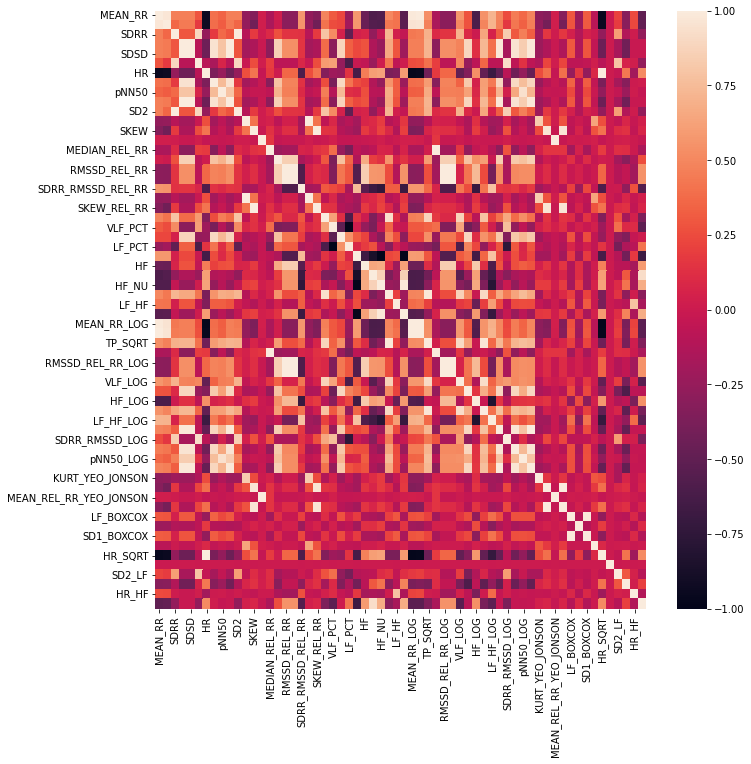

In [ ]:
import seaborn as sns
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
plt.savefig("corrheatmap.pdf")

In [ ]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

33

In [ ]:
corr_features

{'HF_LF',
 'HF_NU',
 'HF_VLF',
 'HR',
 'HR_SQRT',
 'KURT_REL_RR',
 'LF',
 'LF_PCT',
 'MEAN_REL_RR_YEO_JONSON',
 'MEAN_RR_LOG',
 'MEAN_RR_SQRT',
 'MEDIAN_REL_RR_LOG',
 'MEDIAN_RR',
 'RMSSD_LOG',
 'RMSSD_REL_RR_LOG',
 'SD1',
 'SD1_BOXCOX',
 'SD1_LOG',
 'SD2',
 'SDRR_RMSSD_LOG',
 'SDSD',
 'SDSD_REL_RR',
 'SDSD_REL_RR_LOG',
 'SKEW_REL_RR',
 'SKEW_REL_RR_YEO_JONSON',
 'SKEW_YEO_JONSON',
 'TP',
 'TP_LOG',
 'TP_SQRT',
 'VLF_LOG',
 'pNN25',
 'pNN25_LOG',
 'pNN50_LOG'}

In [ ]:
X_train = X_train.drop(corr_features,axis=1)

In [ ]:
X_train

,MEAN_RR,SDRR,RMSSD,SDRR_RMSSD,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,LF_NU,HF,HF_PCT,LF_HF,LF_LOG,HF_LOG,LF_HF_LOG,KURT_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,KURT_SQUARE,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF
517530,890.600199,98.148154,22.768308,4.310735,1.750000,0.008118,-0.696167,0.000501,0.000328,0.026105,0.011791,2.214052,2462.055522,50.268390,99.009006,24.138285,0.492837,99.908783,7.788471,3.224392,4.614217,0.008087,8.786683,6.575407,0.000066,1.778006e+06,0.057166,0.028315,2.828950
353054,859.237918,63.268372,14.133542,4.476470,0.466667,0.016495,0.131457,-0.000064,-0.000321,0.016504,0.009227,1.788667,1340.579155,64.425946,96.021569,29.449424,1.415289,24.135539,6.567766,3.416067,3.224283,0.016390,0.109013,4.287245,0.000272,-1.344368e+07,0.125095,0.098779,2.384090
224824,811.700099,78.561287,14.114375,5.566048,0.866667,1.159472,-0.749567,-0.000162,0.000386,0.018328,0.009697,1.890109,1205.776026,58.325453,94.751615,45.217346,2.187241,18.053481,6.706044,3.833355,2.947250,0.673049,298.841017,1.552580,1.344375,-5.008717e+06,0.135549,0.091501,1.651911
240178,726.015447,117.448529,12.354003,9.506921,0.266667,0.276958,-0.382083,-0.000177,0.000498,0.017950,0.009541,1.881426,2723.530673,79.429104,92.788049,50.869630,1.483563,12.865874,6.485371,3.948733,2.629431,0.262765,26.182306,7.567564,0.076706,-4.101087e+06,0.253433,0.130173,1.674784
218094,978.323869,80.543409,10.337448,7.791421,0.000000,-0.395777,0.055785,-0.000089,-0.000645,0.010610,0.004533,2.340730,770.162552,60.910237,99.732190,1.323675,0.104686,372.399631,6.202406,0.843150,5.922649,-0.451690,229.176146,0.293043,0.156640,-1.101738e+07,0.230599,0.125271,46.650826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124270,812.421718,82.969930,14.295733,5.803825,0.866667,0.635970,-0.734409,0.000019,0.000714,0.018522,0.009851,1.880135,1354.704996,60.912585,94.809196,45.124173,2.028951,18.264840,6.715609,3.831337,2.958282,0.451376,301.210610,1.552346,0.404458,4.312381e+07,0.141838,0.090656,1.655816
257318,563.933592,45.301310,8.270850,5.477225,0.000000,2.848561,1.400894,0.000078,0.000686,0.014101,0.009159,1.539562,519.058467,49.397245,93.267045,35.800856,3.407061,13.852320,6.208439,3.605521,2.698156,2.048088,23.413212,6.468454,8.114301,7.185214e+06,0.128645,0.215810,2.989464
409351,638.787710,58.437096,12.207790,4.786869,0.000000,0.609410,1.008867,0.000675,0.000214,0.018713,0.010916,1.714219,1662.644044,67.309552,93.165143,55.191583,2.234345,13.630885,6.624477,4.028767,2.683135,0.461503,179.653065,3.484829,0.371380,9.465026e+05,0.109250,0.125826,1.715120
524621,1072.954762,100.439821,27.852439,3.606141,6.250000,-0.470333,-0.035896,0.000776,-0.001522,0.026376,0.011651,2.263891,3221.256387,49.233332,99.889919,3.656428,0.055884,907.422151,8.107396,1.538249,6.811709,-0.597576,540.831111,1.237957,0.221213,1.381976e+06,0.042397,0.017005,15.430903


In [ ]:
#X_train=X_train.drop(labels=['condition',"condition_label"], axis=1)
y_train=train['condition_label']
y_train

517530    0
353054    0
224824    1
240178    0
218094    0
         ..
124270    1
257318    1
409351    1
524621    0
449693    1
Name: condition_label, Length: 369101, dtype: int64

In [ ]:
X_test = test.drop(corr_features,axis=1)
X_test=X_test.drop(labels=['condition',"condition_label"], axis=1)
y_test=test['condition_label']
y_test

88346     0
206700    0
477342    0
228883    1
77962     1
         ..
139936    0
6939      1
355457    0
460960    0
210665    1
Name: condition_label, Length: 158187, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)

(369101, 29)
(158187, 29)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
t0=time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=21, max_depth= 10)
dt.fit(X_train, y_train)
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_dt = time.time() - t0
print("Time taken for DT Classifier:{}".format(tt_dt))
accuracy_dt = accuracy_score(y_test, y_pred)


Accuracy of DT classifier on training set: 0.88
Accuracy of DT classifier on test set: 0.88
              precision    recall  f1-score   support

           0     0.9276    0.8687    0.8972     92132
           1     0.8318    0.9054    0.8670     66055

    accuracy                         0.8840    158187
   macro avg     0.8797    0.8871    0.8821    158187
weighted avg     0.8876    0.8840    0.8846    158187

Time taken for DT Classifier:15.228450298309326


[[80038 12094]
 [ 6249 59806]]


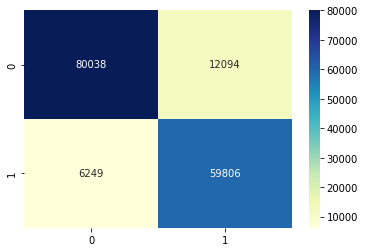

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("DT_conf.pdf")
plt.figure()
plt.show()

0.8870644186000267


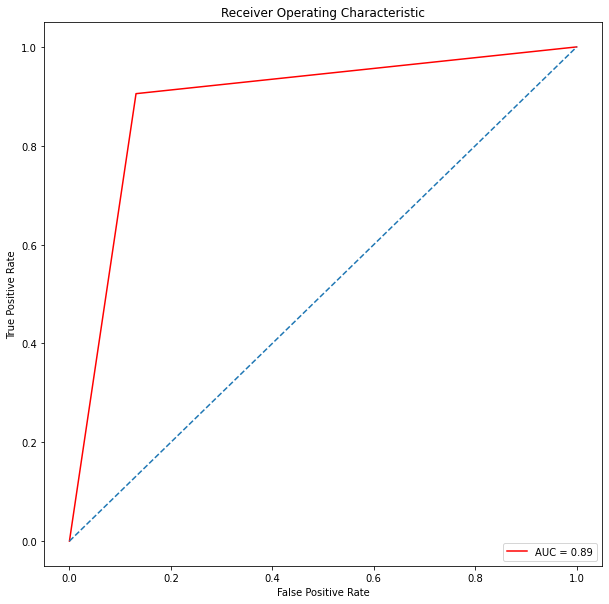

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_DT.pdf")

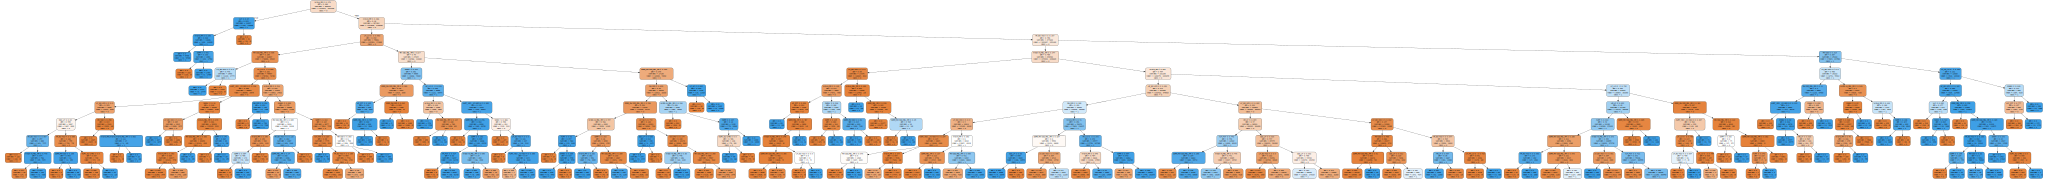

<Figure size 432x288 with 0 Axes>

In [ ]:
import graphviz
from sklearn import tree
classes_ay=['0', '1', '2', '3', '4']
features_ax = ['MEAN_RR',	'SDRR',	'RMSSD',	'SDRR_RMSSD',	'pNN50',	'KURT',	'SKEW',	'MEAN_REL_RR',	'MEDIAN_REL_RR',	'SDRR_REL_RR',	'RMSSD_REL_RR',	'SDRR_RMSSD_REL_RR',	'VLF',	'VLF_PCT',	'LF_NU',	'HF',	'HF_PCT',	'LF_HF',	'LF_LOG',	'HF_LOG',	'LF_HF_LOG',	'KURT_YEO_JONSON',	'LF_BOXCOX',	'HF_BOXCOX',	'KURT_SQUARE',	'MEAN_RR_MEAN_MEAN_REL_RR',	'SD2_LF',	'HR_LF','HR_HF']
dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=features_ax,  
                      class_names=classes_ay,  
                      filled=True, rounded=True,  
                      special_characters=True)  
plt.savefig("DT_Shape.pdf")
graph = graphviz.Source(dot_data)  
graph.render(filename='DT_figure.dot')

graph 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
t0 = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1).fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
tt_knn = time.time() - t0
print("Time taken for K-NN Classifier:{}".format(tt_knn))
accuracy_knn = accuracy_score(y_test, y_pred)

KeyboardInterrupt: ignored

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.figure()
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.linear_model import LogisticRegression
t0 = time.time()
clf = LogisticRegression(random_state=42, max_iter = 300, n_jobs = -1)
clf.fit(X_train, y_train)
# make predictions for test data
y_pred = clf.predict(X_test)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_lr = time.time() - t0
print("Time taken for Logistic Regression Classifier:{}".format(tt_lr))
accuracy_lr = accuracy_score(y_test, y_pred)

Accuracy of Logistic Regression classifier on training set: 0.64
Accuracy of Logistic Regression classifier on test set: 0.64
              precision    recall  f1-score   support

           0     0.6450    0.8384    0.7291     92132
           1     0.6126    0.3565    0.4507     66055

    accuracy                         0.6372    158187
   macro avg     0.6288    0.5974    0.5899    158187
weighted avg     0.6315    0.6372    0.6129    158187

Time taken for Logistic Regression Classifier:84.94373083114624


[[77239 14893]
 [42505 23550]]


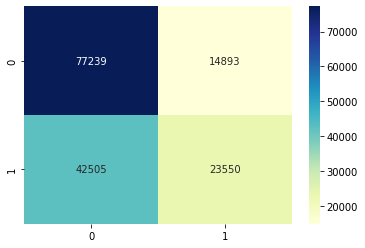

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_LR.pdf")
plt.figure()
plt.show()


0.5974362882987642


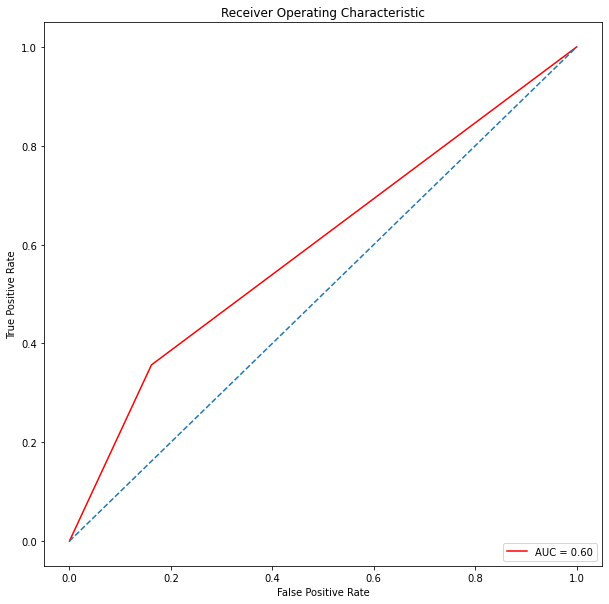

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_LR.pdf")

In [ ]:
t0 = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_rf = time.time() - t0
print("Time taken for RF Classifier:{}".format(tt_rf))
accuracy_rf = accuracy_score(y_test, y_pred)

Accuracy of RF classifier on training set: 0.81
Accuracy of RF classifier on test set: 0.81
              precision    recall  f1-score   support

           0     0.7605    0.9812    0.8569     92132
           1     0.9559    0.5691    0.7135     66055

    accuracy                         0.8091    158187
   macro avg     0.8582    0.7751    0.7852    158187
weighted avg     0.8421    0.8091    0.7970    158187

Time taken for RF Classifier:148.08112168312073


[[90396  1736]
 [28461 37594]]


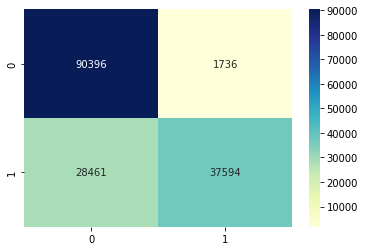

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("RF_conf.pdf")
plt.figure()
plt.show()

0.7751446269183282


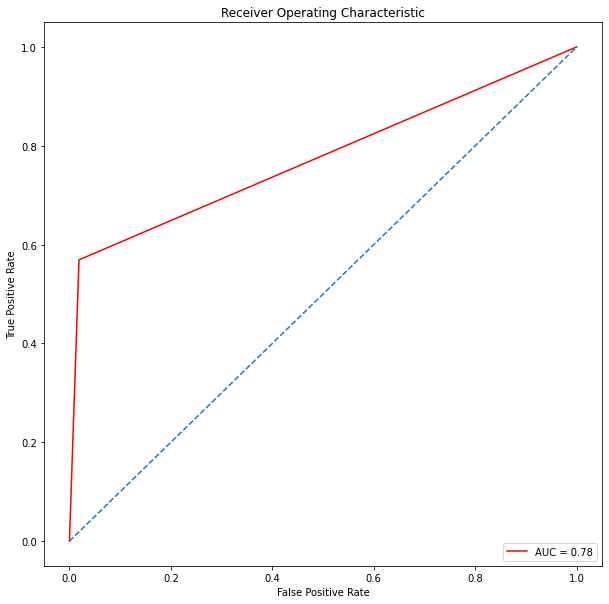

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("RF_ROC.pdf")

In [ ]:
t0 = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print('Accuracy of NB classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))
y_pred = nb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_nb = time.time() - t0
print("Time taken for NB Classifier:{}".format(tt_nb))
accuracy_nb = accuracy_score(y_test, y_pred)

Accuracy of NB classifier on training set: 0.51
Accuracy of NB classifier on test set: 0.51
              precision    recall  f1-score   support

           0     0.7839    0.2188    0.3422     92132
           1     0.4567    0.9159    0.6095     66055

    accuracy                         0.5099    158187
   macro avg     0.6203    0.5674    0.4758    158187
weighted avg     0.6473    0.5099    0.4538    158187

Time taken for NB Classifier:0.7675063610076904


[[20162 71970]
 [ 5557 60498]]


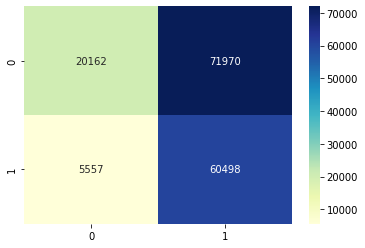

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("NB_conf.pdf")
plt.figure()
plt.show()

0.5673556623544048


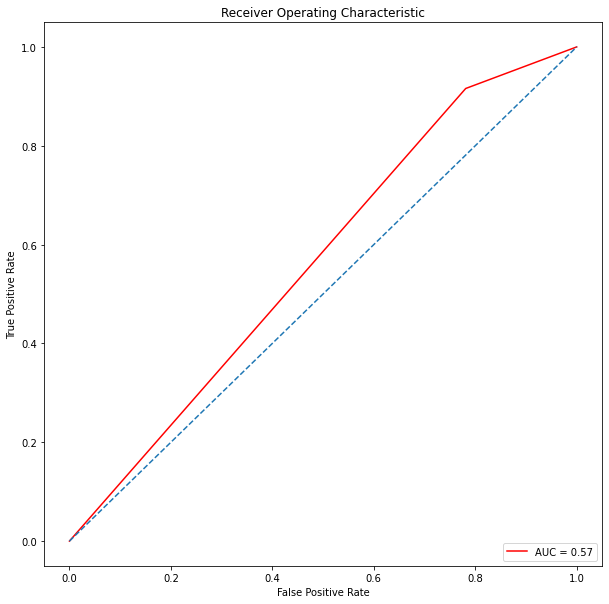

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("NB_ROC.pdf")

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
# make predictions for test data
y_pred = xg.predict(X_test)
print('Accuracy of XGboosting classifier on training set: {:.2f}'
     .format(xg.score(X_train, y_train)))
print('Accuracy of XGboosting classifier on test set: {:.2f}'
     .format(xg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_xg = time.time() - t0
print("Time taken for XGboostig Classifier:{}".format(tt_xg))
accuracy_xg = accuracy_score(y_test, y_pred)

Accuracy of XGboosting classifier on training set: 0.90
Accuracy of XGboosting classifier on test set: 0.90
              precision    recall  f1-score   support

           0     0.8783    0.9539    0.9145     92132
           1     0.9269    0.8157    0.8677     66055

    accuracy                         0.8962    158187
   macro avg     0.9026    0.8848    0.8911    158187
weighted avg     0.8986    0.8962    0.8950    158187

Time taken for XGboostig Classifier:96.09845733642578


[[87884  4248]
 [12177 53878]]


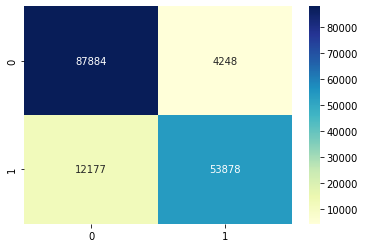

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("XG_conf.pdf")
plt.figure()
plt.show()

0.884772931774065


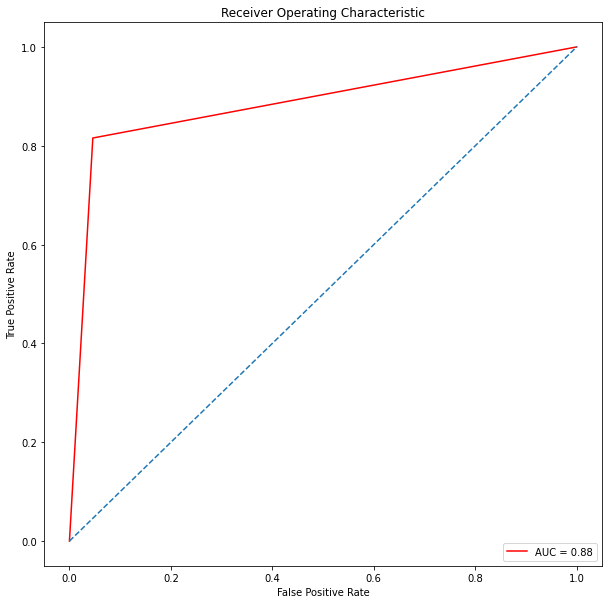

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("XG_ROC.pdf")

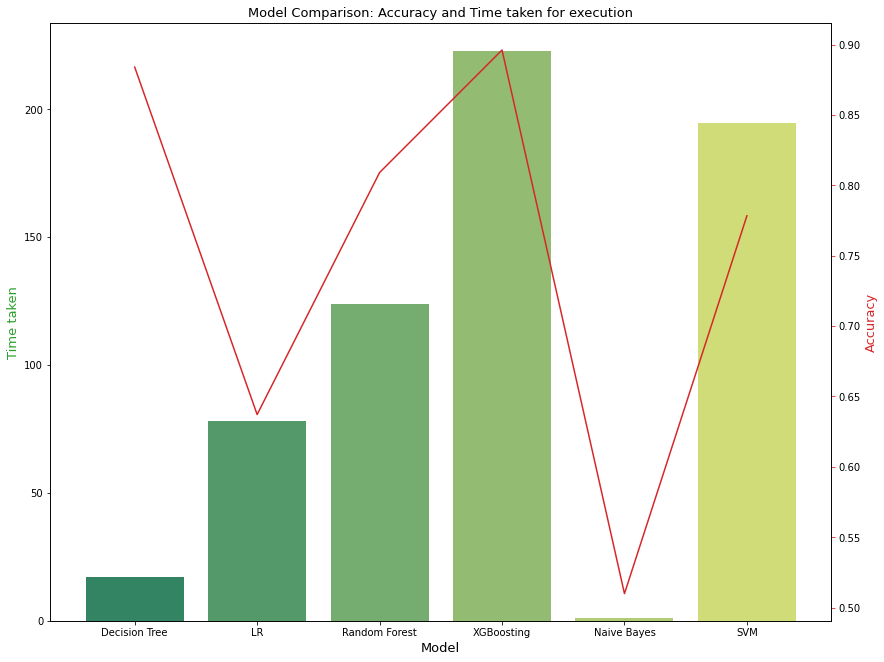

In [ ]:
#Plot of Accuracy vs Time and model
accuracy_scores = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_xg, accuracy_nb, accuracy_svm]
tt = [tt_dt, tt_lr, tt_rf, tt_xg, tt_nb, tt_svm]

model_data = {'Model': ['Decision Tree','LR','Random Forest','XGBoosting','Naive Bayes',"SVM"],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,11))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.savefig("Shallow_ML_compare(NB(51%)).pdf")

In [ ]:
t0 = time.time()
from sklearn import svm

clf = svm.SVC(kernel='rbf', random_state=42, gamma=100, C=10, shrinking=True, tol=1.000, max_iter = 200, probability= True).fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_svm = time.time() - t0
print("Time taken for SVM Classifier:{}".format(tt_svm))
accuracy_svm = accuracy_score(y_test, y_pred)
#kernel='rbf', random_state=21, gamma=10, C=100, shrinking=True, tol=1.000, max_iter = 1000

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.78
              precision    recall  f1-score   support

           0     0.7264    0.9938    0.8393     92132
           1     0.9822    0.4779    0.6430     66055

    accuracy                         0.7784    158187
   macro avg     0.8543    0.7359    0.7411    158187
weighted avg     0.8332    0.7784    0.7573    158187

Time taken for SVM Classifier:165.52415227890015


[[91559   573]
 [34485 31570]]


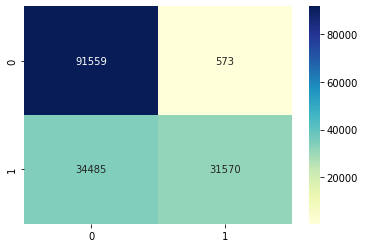

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("svm_conf.pdf")
plt.figure()
plt.show()

0.7358578583246216


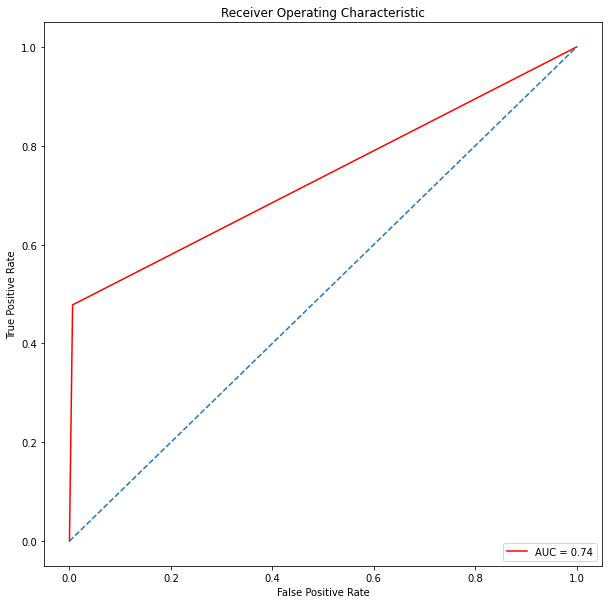

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("svm_ROC.pdf")